## The Sparks Foundation - GRIP OCT'21

## Task 6 - Prediction using Decision Tree Algorithm

## Name - Deepesh Durairajan

### To Do 
* Create the Decision Tree classifier and visualize it graphically 
* If we feed any new data to the classifier, Then It should be able to predict the right class accordingly

### Dataset - https://bit.ly/3kXTdox


In [50]:
# importing importat libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import cross_val_score
# it is use so that we dont have warnings while executing
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset 

In [8]:
cd Downloads

[WinError 2] The system cannot find the file specified: 'downloads'
C:\Users\91976\Downloads\GRIP-TSF-Data-Science-And-Business-Analytics-main


In [10]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
df.head() # head() fetches the first 5 elements of the datset by default

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.shape # Checking the actual number of rows and columns in the dataset

(150, 6)

In [14]:
df.info() # This info() function tells the detail information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df.describe() # describe() function tells about the statistical data like mean, standard deviation, minimum, maximum..etc

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [16]:
# Here we are checking for the null value if any.
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
df.columns # this shows the names of columns present in the dataset

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Visualising the Data

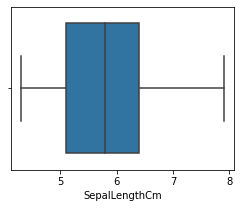

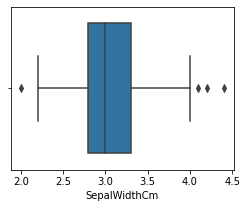

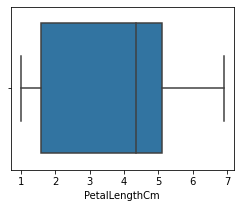

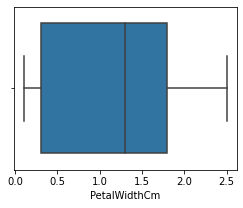

In [19]:
# checking for any outliers in the numeric data

for i in df.columns:
    if df[i].dtype=='float64':
        plt.figure(figsize=(4,3))
        sns.boxplot(df[i])
        plt.show()

In [47]:
corr = df.corr() #defining the correlation matrix

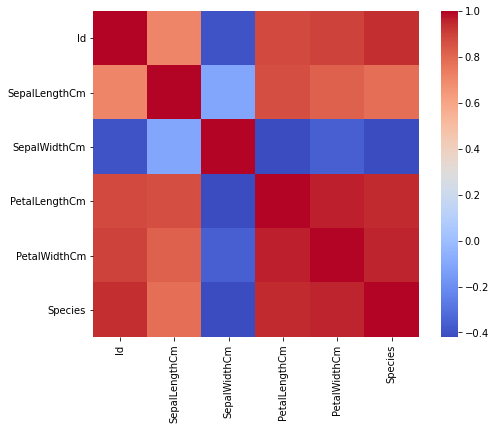

In [48]:
# Plotting correlation matrix heatmap

plt.figure(figsize=(8,6))
sns.heatmap(corr, cbar = True,  square = True,
            cmap= 'coolwarm')

#### Observation : Here we are checking the relationship between variables using correlation matrix and show it using heatmap

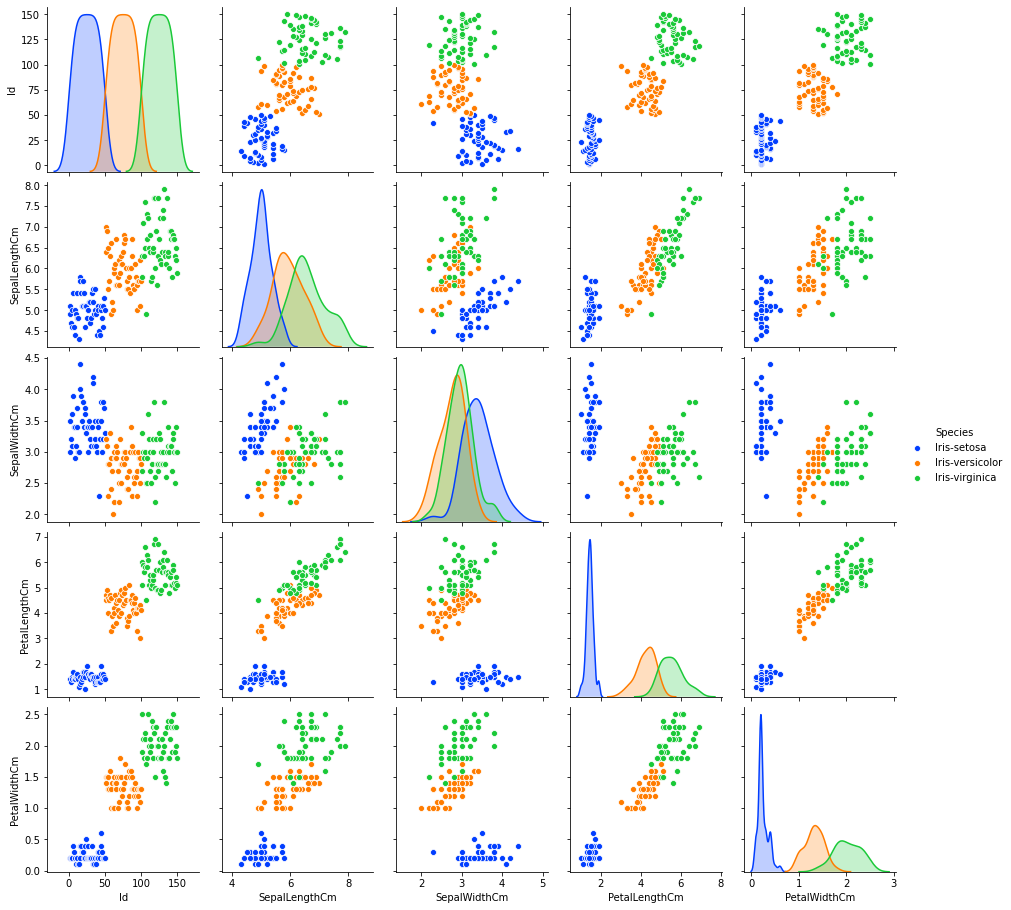

In [22]:
sns.pairplot(df, hue="Species", palette="bright")

In [23]:
df.dtypes # checking the datatypes of the columns

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [24]:
from sklearn import preprocessing

df['Species'] = preprocessing.LabelEncoder().fit_transform(df['Species'])

### Splitting, Training and Testing of the Dataset

In [25]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, -1].values

In [26]:
# Now we use test_train_split function which we inmpoted from the library sklearn in the begining.
# This function splits the data into 2 subsets: Train and Test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3, random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [28]:
# Now we will train the Decission Tree Classificatiom Model

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

print("Decision Tree Classification model trained..")

Decision Tree Classification model trained..


### Visualisation of The Decision Tree

In [29]:
Tree = tree.DecisionTreeClassifier()
Tree = Tree.fit(X_train,y_train)

In [30]:
# This shows the text graph representation of the Decision Tree

reps = tree.export_text(Tree)
print(reps)

|--- feature_2 <= -0.78
|   |--- class: 0
|--- feature_2 >  -0.78
|   |--- feature_2 <= 0.66
|   |   |--- feature_3 <= 0.57
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.57
|   |   |   |--- feature_1 <= 0.08
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.08
|   |   |   |   |--- class: 1
|   |--- feature_2 >  0.66
|   |   |--- feature_2 <= 0.71
|   |   |   |--- feature_1 <= -0.75
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  -0.75
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.71
|   |   |   |--- class: 2



[Text(401.76000000000005, 733.86, 'X[2] <= -0.783\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]'),
 Text(301.32000000000005, 570.78, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(502.20000000000005, 570.78, 'X[2] <= 0.656\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]'),
 Text(200.88000000000002, 407.70000000000005, 'X[3] <= 0.573\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]'),
 Text(100.44000000000001, 244.62, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(301.32000000000005, 244.62, 'X[1] <= 0.078\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 81.54000000000008, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(401.76000000000005, 81.54000000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(803.5200000000001, 407.70000000000005, 'X[2] <= 0.711\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(703.08, 244.62, 'X[1] <= -0.746\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(602.6400000000001, 81.540000000

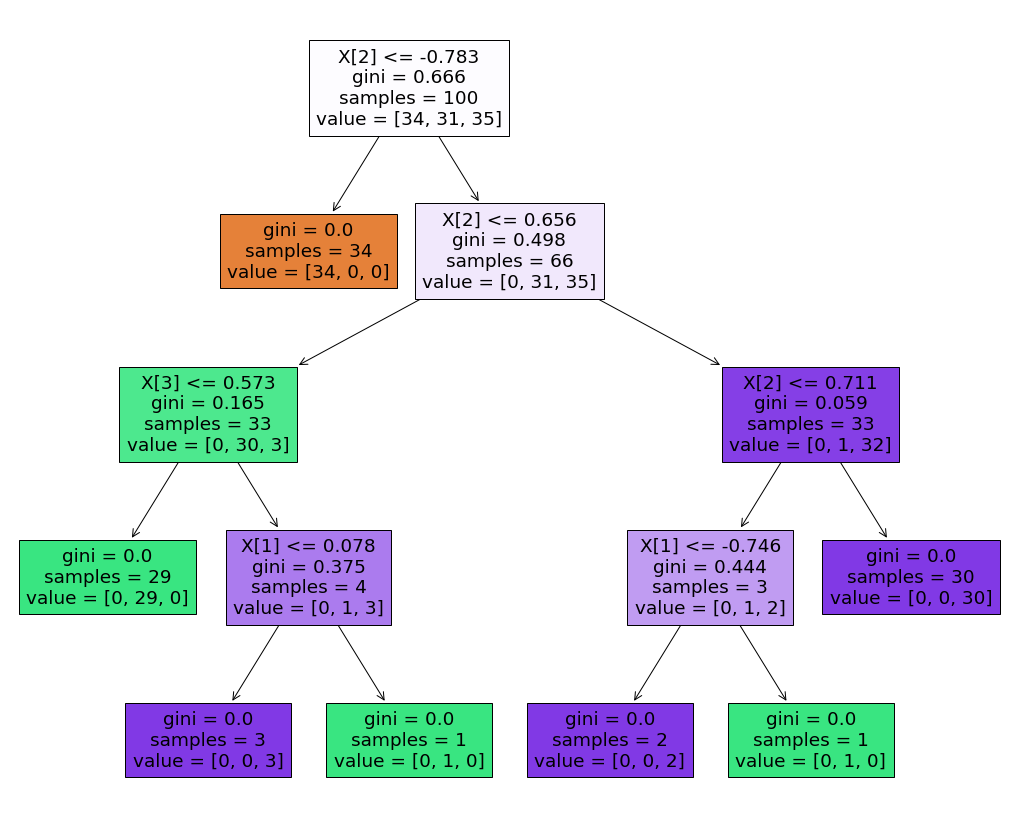

In [31]:
# Plotting the tree

plt.figure(figsize=(18,15))
plot_tree(Tree, filled=True, impurity=True)

### Checking the Accuracy and Plotting Confusion Matrix

In [52]:
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X_train, y_train, cv=10)
clf.fit(X_train,y_train, sample_weight=None, check_input=True, X_idx_sorted=None)
clf.get_params(deep=True)
clf.predict(X_test, check_input=True)
clf.predict_log_proba(X_test)
clf.predict(X_test,check_input=True)
print(clf.score(X_test,y_test, sample_weight=None))

0.98


In [32]:
print("The shape of Train and Test data are :\n")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

The shape of Train and Test data are :

(100, 4)
(50, 4)
(100,)
(50,)


In [34]:
data2 = pd.DataFrame({"Actual":y_test,"Predicted":Y_pred})
data2.head()

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


In [36]:
# defining confusion matrix

cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]


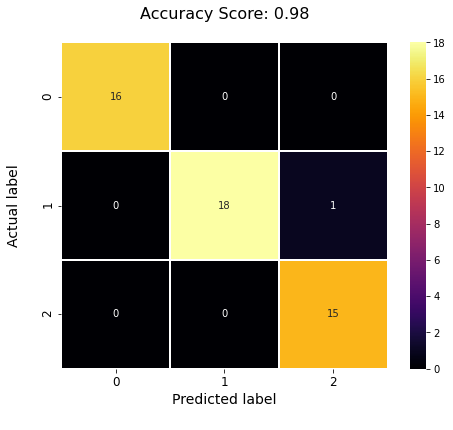

In [53]:
# Plotting of confusion matrix

clf.score(X_test,y_test, sample_weight=None)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt='.0f', linewidths=0.5, square = True, cmap = 'inferno');
plt.title("Accuracy Score: {}\n".format(Score), size=16);
plt.xlabel('Predicted label\n', fontsize = 14);
plt.ylabel('Actual label\n', fontsize = 14);
plt.tick_params(labelsize=12)
plt.show()

### Final Classification Report 

In [38]:
# This shows the final report of X_test dataset

from sklearn import metrics
print(metrics.classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Conclusion : This classifier model can predict the Species of the flower with <b>98%</b> Accuracy Score